<a href="https://colab.research.google.com/github/VinayKenguva/wine-quality-prediction/blob/main/ML_Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***WINE  QUALITY  PREDICTION (RED-WINE)***

**Using  Inbuilt  Linear Regression Model**

In [ ]:
# Importin necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
# creating dataframe and checking the existance of null values
df1 = pd.read_csv('winequality-red.csv')
print(df1.shape)
df1.isnull().sum()


(1599, 12)


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df1.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


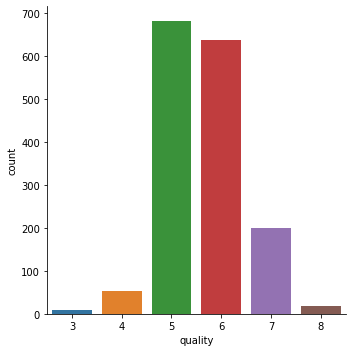

In [ ]:
# number of values for each quality
sns.catplot(x='quality', data = df1, kind = 'count')

In [ ]:
# values taken by output
df1['quality'].unique()

array([5, 6, 7, 4, 8, 3])

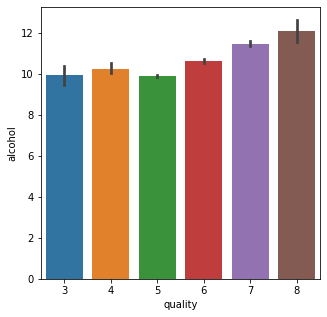

In [ ]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'alcohol', data = df1)

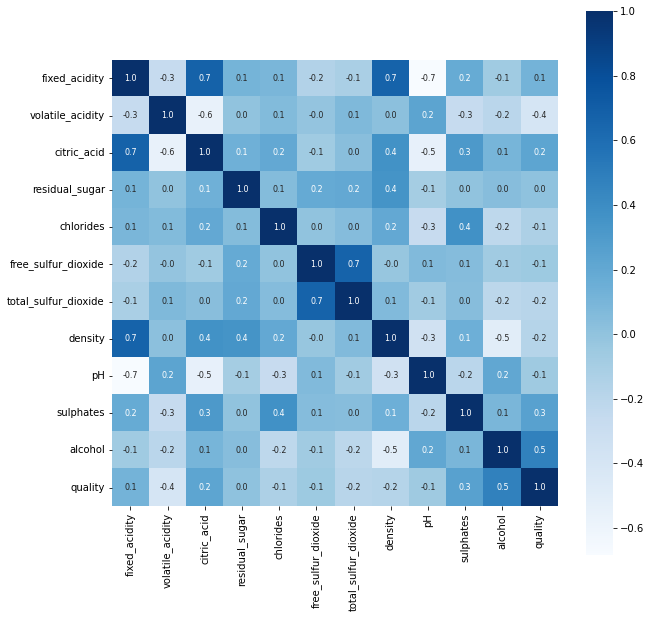

In [ ]:
# positive and negative correlation
correlation = df1.corr()
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

In [ ]:
X = df1.drop('quality',axis=1)
Y = df1['quality']
# spliting into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
# Build the linear regression model using LinearRegression()
linear_regressor = LinearRegression()
# Fit the model to our training data
linear_regressor.fit(X_train, Y_train)
# Print the values of coefficients of each feature
features=df1.loc[0].drop(['quality'])
coeffecients = pd.DataFrame(linear_regressor.coef_,features)
coeffecients.columns=['cofffecients']
print(coeffecients)
print("\nintercept :",linear_regressor.intercept_)

         cofffecients
0                    
7.4000      -0.000165
0.7000      -0.998502
0.0000      -0.048217
1.9000       0.005794
0.0760      -2.295176
11.0000      0.003993
34.0000     -0.003098
0.9978      -7.584171
3.5100      -0.490698
0.5600       0.935885
9.4000       0.282872

intercept : 12.069991033367444


In [ ]:
# predicting output for train and test samples
linear_train_pred = linear_regressor.predict(X_train)
linear_test_pred = linear_regressor.predict(X_test)

In [ ]:
# The MSE for training and testing sets need to be similar for good model
linear_mse_train = metrics.mean_squared_error(linear_train_pred,Y_train)
linear_mse_test = metrics.mean_squared_error(linear_test_pred, Y_test)
print("tain_mse: ",linear_mse_train)
print("test_mse: ",linear_mse_test)

tain_mse:  0.41896191840120967
test_mse:  0.41188052273565223


In [ ]:
linear_test_predicted_data = np.round_(linear_test_pred)
test_data_accuracy = accuracy_score(linear_test_predicted_data, Y_test)
print("accuracy of testing set :",test_data_accuracy)
linear_train_predicted_data = np.round_(linear_train_pred)
train_data_accuracy = accuracy_score(linear_train_predicted_data,Y_train)
print("accuracy of training set :",train_data_accuracy)

accuracy of testing set : 0.56875
accuracy of training set : 0.602814698983581


In [ ]:
# Calculating other error functions
print('Mean Absolute Error:', metrics.mean_absolute_error(linear_test_pred, Y_test))
print('Mean Squared Error:', metrics.mean_squared_error(linear_test_pred, Y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(linear_test_pred, Y_test)))


Mean Absolute Error: 0.5134696934943593
Mean Squared Error: 0.41188052273565223
Root Mean Squared Error: 0.641779185339983


**Using  implemented  Linear  Regression** **mode**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df1 = pd.read_csv('winequality-red.csv')
df = pd.DataFrame()
df[0] = [1 for i in range(len(df1))]
for i in range(df1.columns.size):
  df[i+1] = df1.iloc[:,i]

# before normalization
# print(df.head())

# Normalising data
list1 = []
maxval = -1
for i in range(df.columns.size-1):
  maxval = max(maxval,df[i].max())
for i in range(1,df.columns.size-1):
  df[i] = df[i]/maxval

# spliting into train,validation,test set
train_set = df.sample(frac=0.6)
remaining = df.drop(train_set.index)
validation_set = remaining.sample(frac=0.4)
test_set = remaining.drop(validation_set.index)

# after normalization
# print(df.head())

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1599.0,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,1.0,0.028788,0.001826,0.000938,0.008785,0.000303,0.054931,0.160788,0.003449,0.011457,0.002277,0.036066,5.636023
std,0.0,0.006025,0.000620,0.000674,0.004879,0.000163,0.036194,0.113825,0.000007,0.000534,0.000587,0.003687,0.807569
min,1.0,0.015917,0.000415,0.000000,0.003114,0.000042,0.003460,0.020761,0.003426,0.009481,0.001142,0.029066,3.000000
25%,1.0,0.024567,0.001349,0.000311,0.006574,0.000242,0.024221,0.076125,0.003445,0.011107,0.001903,0.032872,5.000000
50%,1.0,0.027336,0.001799,0.000900,0.007612,0.000273,0.048443,0.131488,0.003449,0.011453,0.002145,0.035294,6.000000
75%,1.0,0.031834,0.002215,0.001453,0.008997,0.000311,0.072664,0.214533,0.003453,0.011765,0.002526,0.038408,6.000000
max,1.0,0.055017,0.005467,0.003460,0.053633,0.002114,0.249135,1.000000,0.003473,0.013875,0.006920,0.051557,8.000000


In [ ]:
class Linear_regression2 : 
  def __init__(self,alpha,rho,epoch,data):
    self.alpha,self.rho,self.epoch=alpha,rho,epoch
    self.data = data
    self.m = len(self.data)
    self.n = data.columns.size
    arr = np.random.uniform(-0.3,0.3,self.n-1)
    self.w = pd.Series(arr)
    self.error = [0.0]
    self.Y_Predict = self.predict()

  def iterate(self):
    i=0
    error_dif = self.cur_error() - self.error[len(self.error)-1]
    while((i<self.epoch and error_dif>self.rho) or i==0):
      self.update()
      i+=1
      self.error.append(self.cur_error())
  
  def update(self):
    self.Y_Predict = self.predict()
    for i in range(len(self.w)):
      self.w[i]=self.w[i]-(self.alpha/self.m)*((self.Y_Predict-self.data[self.n-1]).dot(self.data[i]))
    # for i in range (self.m):
    #   for j in range (len(self.w)):
    #      self.w[j]=self.w[j]-(self.alpha)*((self.Y_Predict[i]-self.data.iloc[i,self.n-1]))*self.data.iloc[i,j]
      
     
  def predict(self):
    arr =[]
    for i in range (self.m):
      temp=pd.Series(self.data.iloc[i])
      temp.pop(self.n-1)
      arr.append(temp.dot(self.w))
    return arr

  def cur_error(self):
    psum=0
    for i in range(self.m):
      psum = psum  + (self.Y_Predict[i]-self.data.iloc[i,self.n-1])**2
    psum = psum/(2*self.m)
    return psum

In [ ]:
rho_arr = [0.8,0.5,0.9,0.6,0.7]
alpha_arr = [0.015,0.005,0.03,0.02,0.01]
epoch_arr = [160,155,130,150,140]

w_arr = []
error_arr = []

for i in range(5):
  model = Linear_regression2(alpha_arr[i],rho_arr[i],epoch_arr[i],train_set)
  model.iterate()
  w_arr.append(model.w)
  error_arr.append(model.cur_error())

In [ ]:
print(w_arr)
print(error_arr)

[0     5.054561
1    -0.061431
2     0.293521
3    -0.077038
4     0.034280
5    -0.146711
6     0.250273
7     0.618649
8     0.009849
9    -0.171357
10    0.160408
11    0.003445
dtype: float64, 0     3.046228
1     0.182646
2    -0.109435
3    -0.059278
4     0.182195
5    -0.120795
6     0.264128
7     0.351136
8     0.129925
9    -0.093214
10   -0.127755
11    0.013217
dtype: float64, 0     5.353384
1     0.028302
2     0.299278
3    -0.031828
4    -0.174341
5    -0.288673
6     0.433343
7     0.844178
8    -0.003897
9    -0.060152
10    0.240555
11    0.250939
dtype: float64, 0     5.173270
1     0.183916
2     0.159662
3    -0.144704
4    -0.049136
5    -0.135856
6     0.389301
7     1.009681
8    -0.000676
9     0.110402
10   -0.017904
11    0.171339
dtype: float64, 0     4.246606
1     0.387475
2     0.183313
3    -0.027482
4     0.032567
5     0.121757
6     0.048215
7     0.393997
8     0.160455
9    -0.084780
10   -0.286559
11   -0.147957
dtype: float64]
[0.4529179553827492

In [ ]:
def find_error(w,dataframe):
  tarr = w.values
  w = pd.DataFrame(tarr.reshape(w.size,1))
  tempdf = dataframe.drop(columns=[dataframe.columns.size-1])
  predict =  tempdf.dot(w)
  psum=0
  for i in range(len(dataframe)):
    psum=psum + (predict.iloc[i,0]-dataframe.iloc[i,dataframe.columns.size-1])**2
  
  psum = 1/(2*(len(dataframe)))*psum
  return psum

In [ ]:
# initialising 0th index as best then iterating to find best one (best w => best alpha)
best = 0
min_error = find_error(w_arr[0],validation_set)
for i in range(1,5):
  e=find_error(w_arr[i],validation_set)
  if min_error-e>0:
    min_error=e
    best=i

Results

In [ ]:
# prints the best index
print(best)

2


Finding MSE for different hyperparameters.

In [ ]:
print("MSE for train,validation,test set with different set of hyper parameters\n")
print("     Train set             Validation set               Test set")
for i in range(0,5):
  e1=find_error(w_arr[i],train_set)
  e2=find_error(w_arr[i],validation_set)
  e3=find_error(w_arr[i],test_set)
  print(e1,"     ",e2,"       ",e3)

MSE for train,validation,test set with different set of hyper parameters

     Train set             Validation set               Test set
0.4496916638621648       0.42662579560038355         0.4687953149144022
3.4569753318167735       3.464783525914629         3.5893691584616345
0.3578412414774289       0.3268469502526114         0.3575060328738431
0.38952821043618524       0.3592845578205362         0.3975673462855909
1.1877675261613099       1.1792957005406868         1.2542111928246484


Finding Accuracy with different combination of rho,alpha and epoch

In [ ]:
def prediction(w,data):
  arr=[]
  for i in range(len(data)):
    temp1=pd.Series(w)
    temp2=data.iloc[i,:].drop([12])
    arr.append(temp2.dot(temp1))
  return arr

In [ ]:
for i in range(0,5):
  predicted_values1=np.round_(prediction(w_arr[i],train_set))
  predicted_values2=np.round_(prediction(w_arr[i],validation_set))
  predicted_values3=np.round_(prediction(w_arr[i],test_set))

  total_ct1 = len(train_set)
  correct_ct1 = 0
  total_ct2 = len(validation_set)
  correct_ct2 = 0
  total_ct3 = len(test_set)
  correct_ct3 = 0
  for i in range(len(train_set)):
    if(train_set.iloc[i][len(df.columns)-1]==predicted_values1[i]):
      correct_ct1+=1
  for i in range(len(validation_set)):
    if(validation_set.iloc[i][len(df.columns)-1]==predicted_values2[i]):
      correct_ct2+=1
  for i in range(len(test_set)):
    if(test_set.iloc[i][len(df.columns)-1]==predicted_values3[i]):
      correct_ct3+=1
  
  print("Accuracy1 : ",(correct_ct1/total_ct1)*100)
  print("Accuracy2 : ",(correct_ct2/total_ct2)*100)
  print("Accuracy3 : ",(correct_ct3/total_ct3)*100)
  print("------------------------------------------")

Accuracy1 :  43.691345151199165
Accuracy2 :  41.796875
Accuracy3 :  40.36458333333333
------------------------------------------
Accuracy1 :  0.8342022940563086
Accuracy2 :  0.390625
Accuracy3 :  0.26041666666666663
------------------------------------------
Accuracy1 :  34.41084462982273
Accuracy2 :  43.359375
Accuracy3 :  35.41666666666667
------------------------------------------
Accuracy1 :  35.66214807090719
Accuracy2 :  38.671875
Accuracy3 :  30.989583333333332
------------------------------------------
Accuracy1 :  3.1282586027111576
Accuracy2 :  3.515625
Accuracy3 :  3.6458333333333335
------------------------------------------
